In [ ]:
# default_exp function_approximation

# Function Approximation

> function approximation playground

`Go to Runtime -> Change runtime type and make sure Hardward accelerator is set to GPU`

In [ ]:
# export
from abc import ABC, abstractmethod
from fastcore.test import *
import jovsatools
from jovsatools import data_generator
from nbdev.showdoc import *
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

test_eq(tf.__version__, "2.2.0")

In [ ]:
# export

class KerasPipeline(ABC):
    """Scafolding for a model building pipeline.
    
    This base class will contain scafolding for all pipelines
    used. The goal of this base class is mainly to add safeguard
    and assumption enforcement.
    """
    def __init__(self):
        # safe guard: to ensure that various session don't collide
        keras.backend.clear_session()
        self.train_x, self.train_y, self.test_x, self.test_y = None, None, None, None
        self.model = None
        self.evaluation = None
        self.train_history = None
    
    @abstractmethod
    def get_data(self):
        pass

    @abstractmethod
    def build_model(self):
        pass
    
    @abstractmethod
    def run_training(self):
        pass
    
    @abstractmethod
    def evaluate_pipeline(self):
        pass
    
    def keras_model_summary(self):
        assert self.model is not None
        return self.model.summary()
    
    @abstractmethod    
    def __call__(self):
        # checking that self.get_data() is implimented as expected
        assert list(
            map(lambda x: x is not None, [self.train_x, self.train_y, self.test_x, self.test_y])
            )  == [True] * 4 

        # checking that self.model() is implimented as expected
        assert self.model is not None

        # checking that self.train() is implimented as expected
        assert self.train_history is not None
        assert self.model._is_compiled == True

        # checking that self.evaluate() is implimented as expected
        assert self.evaluation is not None

        # TODO (jovsa): run tests that ensure pipeline trains model above a benchmark
        

### Using High Level APIs

#### Using tf.keras Functional API

In [ ]:
#export
class HighLevelKerasPipeline(KerasPipeline):
    def __init__(self):
        super().__init__()
    
    def get_data(self):
        additional_y, train_n = 0, 1000
        data = data_generator.MNISTDataGenerator(additional_y)
        datasets  = data(train_n)
        self.train_x, self.train_y, self.test_x, self.test_y = datasets

    def build_model(self):
        inputs = keras.Input(shape=(784, 1))
        # Rescale images to [0, 1]
        x = Rescaling(scale=1./255)(inputs)
        x = keras.layers.Flatten()(x)
        x = keras.layers.Dense(units=128, activation='relu')(x)
        x = keras.layers.Dense(units=128, activation='relu')(x)
        outputs = keras.layers.Dense(units=10, activation='softmax')(x)

        self.model = keras.Model(inputs=inputs, outputs=outputs)

    def run_training(self):
        self.model.compile(
            optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=[keras.metrics.SparseCategoricalAccuracy()])
        
        self.train_history = self.model.fit(
            x=self.train_x, y=self.train_y, epochs=10, batch_size=64, 
            verbose=1, validation_split=0.1)

    def evaluate_pipeline(self):
        self.evaluation = self.model.evaluate(x=self.test_x, y=self.test_y)
        print(self.evaluation)
    
    def __call__(self):
        self.get_data()
        self.build_model()
        self.run_training()
        print(self.keras_model_summary())
        self.evaluate_pipeline()
        super().__call__()

In [ ]:
pipeline_1 = HighLevelKerasPipeline()
pipeline_1()

Epoch 1/10
15/15 [==============================] - 0s 15ms/step - loss: 1.5474 - sparse_categorical_accuracy: 0.5733 - val_loss: 1.3270 - val_sparse_categorical_accuracy: 0.4800
Epoch 2/10
15/15 [==============================] - 0s 9ms/step - loss: 0.7006 - sparse_categorical_accuracy: 0.8378 - val_loss: 1.0364 - val_sparse_categorical_accuracy: 0.6300
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.4833 - sparse_categorical_accuracy: 0.8700 - val_loss: 0.9352 - val_sparse_categorical_accuracy: 0.6100
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.3730 - sparse_categorical_accuracy: 0.8967 - val_loss: 0.4837 - val_sparse_categorical_accuracy: 0.8800
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.3002 - sparse_categorical_accuracy: 0.9200 - val_loss: 0.4662 - val_sparse_categorical_accuracy: 0.8900
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 0.2332 - sparse_categorical_accuracy:

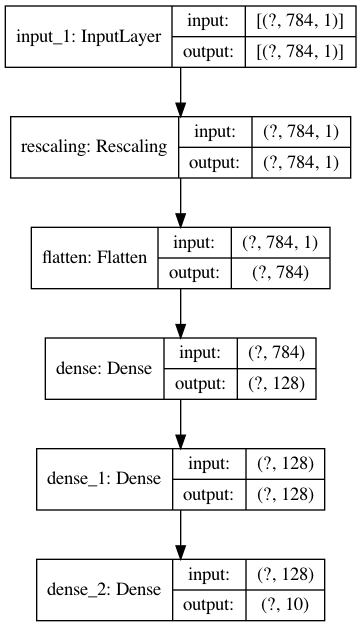

In [ ]:
# ignore
keras.utils.plot_model(pipeline_1.model, show_shapes=True)

## Experimenation Log

Model Based
* Using High Level APIs
    * tf.keras functional
* Custom layers
* Custom models
* Custom metrics
* Custom loss
* Custom activation functions
* Custom initializers, regularizers and constants
* Custom training loops
* Custom gradients

Data Loading
 * Tf Example
 * 
Hyperparameter Search


## References
* [Keras for Engineers](https://colab.research.google.com/drive/1lWUGZarlbORaHYUZlF9muCgpPl8pEvve)
* [Keras for Researchers](https://colab.research.google.com/drive/169PfzM0kvtA5UP4k6Sl1yCG9tsE2MLia#scrollTo=4T2NXVLa9Cld)